# WeRateDogs Twitter Analysis
### Blog post by Jorge Muñoz Rama
#### Novembre 2022

One of the main characteristics of the WeRateDogs twitter account is that they give a rating of the photos of the dogs, but in this rating the numerator is greater than the denominator. As a general rule, the numerator is greater than 10 and the denominator is equal to 10, but this is not always the case. The data to perform the analysis was supplied by Udacity, only included tweets from November 2015 to August 2017and after a process of gathering, exploring and cleaning it, we want to show the results of that analysis.


<center><img src="https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg"/, width="600" height="200"><center>

## Question 1: What are the top 10 dog names with the most number of tweets?
In the table shown we can see that the name of the dog with the most tweets is Charlie with eleven tweets, folow by Lucy with ten tweets and Oliver.

In [151]:
archive_master.groupby('name_dog').count().sort_values(by = 'tweet_id', 
        ascending = False).reset_index()[['name_dog', 'tweet_id']].rename({'tweet_id': 'count'}, axis=1). head(10)

,name_dog,count
0,Charlie,11
1,Lucy,10
2,Oliver,10
3,Cooper,10
4,Tucker,9
5,Penny,9
6,Winston,8
7,Sadie,8
8,Daisy,7
9,Lola,7


## Question 2: What is the Correlation between likes and retweets?
We found that there is a strong positive correlation between likes and retweets

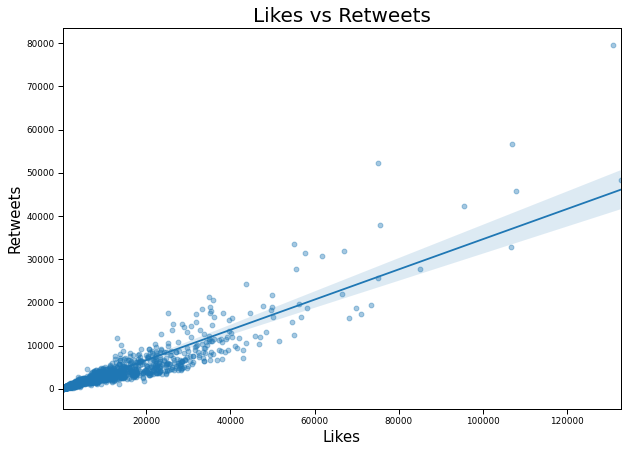

In [152]:
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":15})
g = sns.regplot(x="favorite_count", y="retweet_count", data= archive_master, scatter_kws={'alpha':0.4})
g.set_xlabel('Likes')
g.set_ylabel('Retweets')
g.set(title='Likes vs Retweets')
plt.gcf().set_size_inches(10, 7);

## Question 3: What is the weekly trend of retweets in  WeRateDogs over time?
There is not a clear trend in the weekly number of reteets over time. We observed a big peak of the weekly retwees during the 2015-12-27 (137,876 retweets).

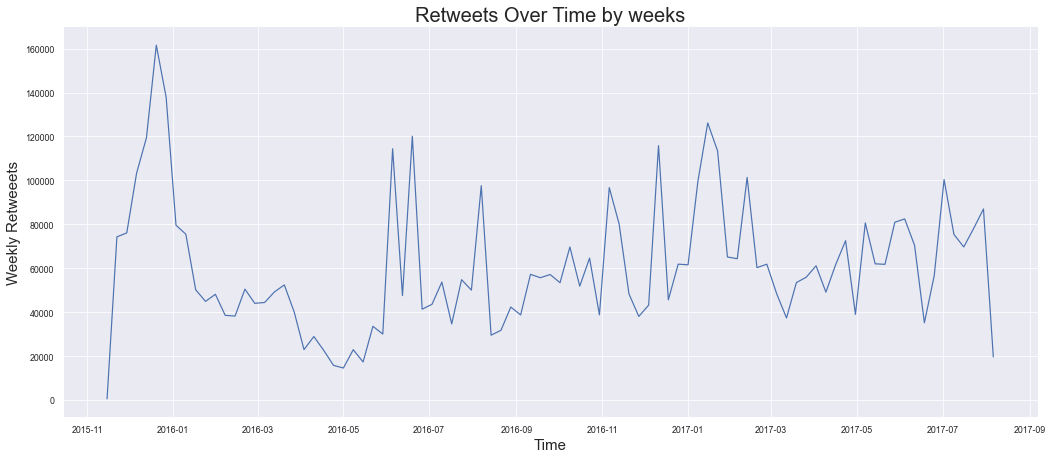

In [278]:
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.relplot(x="timestamp", y="weekly_retweets", kind = 'line',
               data=weekly_data)
g.set_axis_labels("Time", "Weekly Retweeets")
g.set(title='Retweets Over Time by weeks')
plt.gcf().set_size_inches(20, 7)

## Question 4: What is the weekly trend of tweets in  WeRateDogs over time?
There is a decreasing trend in the number of weekly tweets over time. the rate of decrease in the number of tweets is high between November 2015 and May 2016.

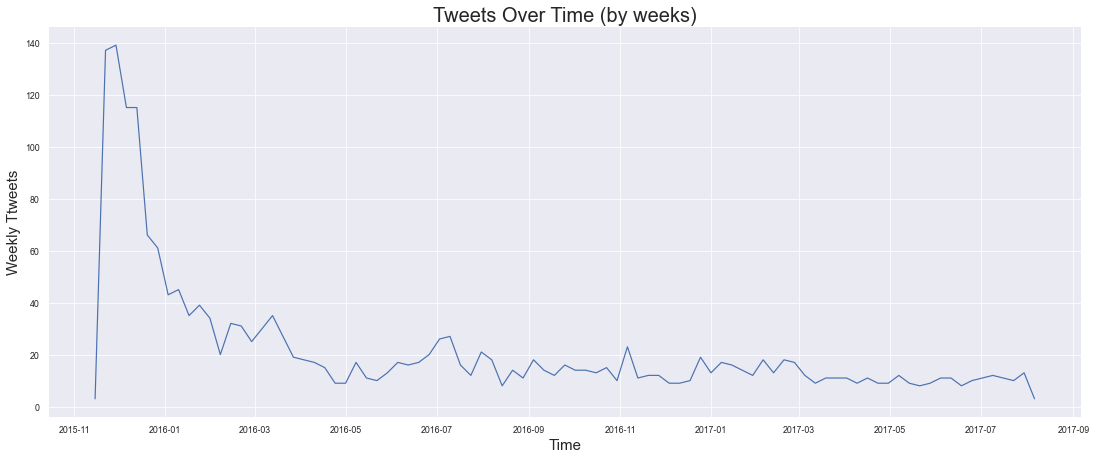

In [279]:
sns.set_context("paper", rc={"font.size":30,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.relplot(x="timestamp", y="weekly_tweets", kind = 'line',
               data=weekly_data)
g.set_axis_labels("Time", "Weekly Ttweets")
g.set(title='Tweets Over Time (by weeks)')
plt.gcf().set_size_inches(20, 7)

## Question 5: What is the stage of dog with more tweets?
we have to clarify that although in principle there are only four stages of dog, we found that some tweets have more the one dog and more the one type of stage. We get from tweet text all the posible combinations of stages and we got nine in total differente stages of dog like pupper, puppers, doggo, doggos, floofer, puppo, and the  combinations like pupper-doggo doggo-floofer and puppo_doggo.

In [154]:
tweet_by_stage = archive_master.groupby('stage_dog').agg({  'tweet_id': 'count', 
                                                          'rating': 'mean', 'favorite_count': 'mean',
                                                          'retweet_count': 'mean', 'confidence_level':'mean'}).reset_index()
tweet_by_stage.rename({'tweet_id': 'number_tweets', 'rating': 'rating_mean', 'favorite_count': 'favorite_mean', 
    'retweet_count': 'retweet_mean', 'confidence_level':'confidence_level_mean'}, axis=1, inplace=True)


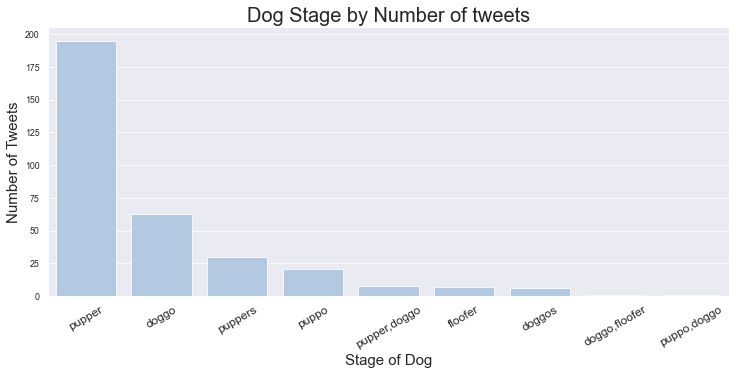

In [203]:
# Lets make a plot that shows the Dog Stage by Number of tweets
sns.set_context("paper", rc={"font.size":70,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.catplot(x="stage_dog", y="number_tweets",  kind="bar", color= '#abc9ea', 
               data=tweet_by_stage.sort_values(by = 'number_tweets', ascending= False))
g.set_axis_labels("Stage of Dog", "Number of Tweets")
g.set_xticklabels(rotation=30, size = 12)
g.set(title='Dog Stage by Number of tweets')
plt.gcf().set_size_inches(20, 7)

Pupper is the first place follow by doggo, pupper and puppo.

## Question 6: What is the top 20 breed of dog by number of tweets?
Golden_retriever had more tweets follow by labrador_retriever and pembroke.

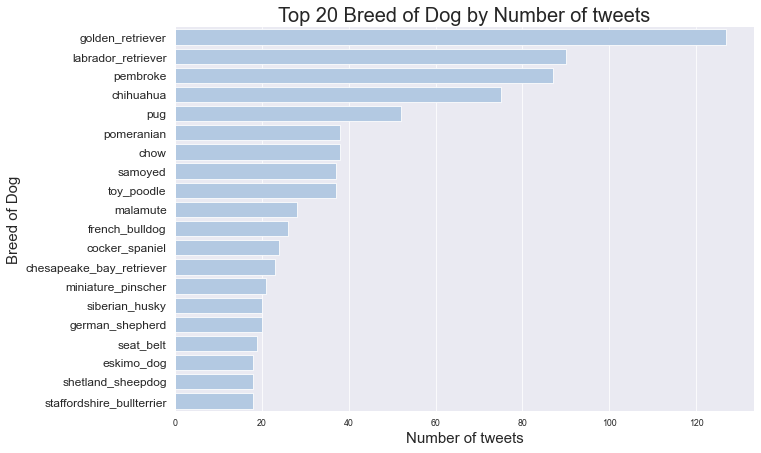

In [158]:
sns.set_context("paper", rc={"font.size":70,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.catplot(x="number_tweets", y="breed_dog", kind = 'bar',color= '#abc9ea', data=tweet20_by_breed )
g.set_axis_labels( 'Number of tweets', 'Breed of Dog')
g.set(title='Top 20 Breed of Dog by Number of tweets')
g.set_yticklabels( size = 12)
plt.gcf().set_size_inches(30, 10)

## Question 7: What is the top 20 breed of dog by rating mean?
To answer this question we only considered dog breeds that had at least ten tweets, we did this because we considered the mean of the ratings and we tried that dog breeds with very few tweets will not generate outliers in our analysis.
In the graph below we see that eskimo_dog has the highest rating, follow by samoyed and golden_retriever.

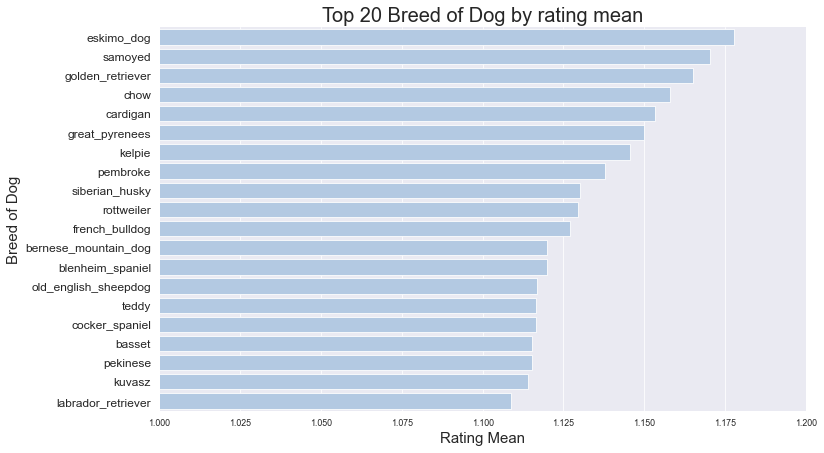

In [751]:
sns.set_context("paper", rc={"font.size":70,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.catplot(x="rating_mean", y="breed_dog", kind = 'bar',color= '#abc9ea', data=breed20_rating )
plt.xlim(1, 1.2)
g.set_axis_labels( 'Rating Mean', 'Breed of Dog')
g.set(title='Top 20 Breed of Dog by rating mean')
g.set_yticklabels( size = 12)
plt.gcf().set_size_inches(30, 10)

## Question 8: What is the top 20 breed of dog by mean of likes at least ten tweets?

french_bulldog has 17913 likes on average, follow by cardigan and basset.

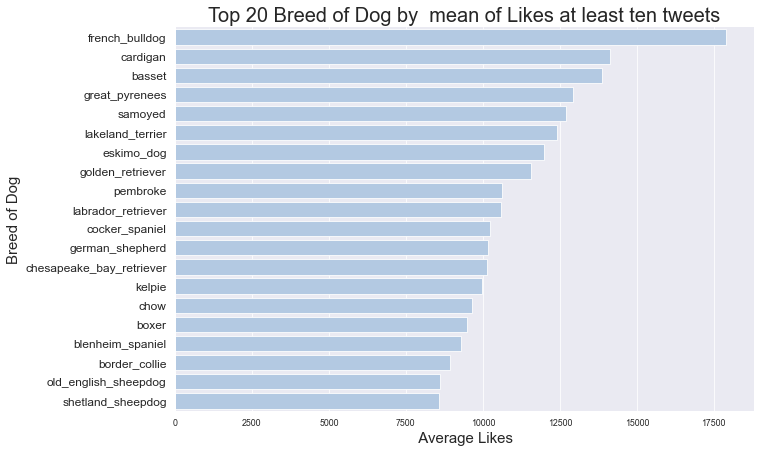

In [754]:
sns.set_context("paper", rc={"font.size":70,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.catplot(x="favorite_mean", y="breed_dog", kind = 'bar',color= '#abc9ea', data= breed_favorite )
g.set_axis_labels( ' Average Likes', 'Breed of Dog')
g.set(title='Top 20 Breed of Dog by  mean of Likes at least ten tweets')
g.set_yticklabels( size = 12)
plt.gcf().set_size_inches(30, 10)

#### Here is the breed of dog with more likes on average 👇


<center><img src="https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg"/, width="600" height="200"><center>

## Question 9: What is the top 20 breed of dog by mean of retweets at least ten tweets?¶

We found in the first place eskimo_dog, follow by great_pyrenees and frech_bulldog.

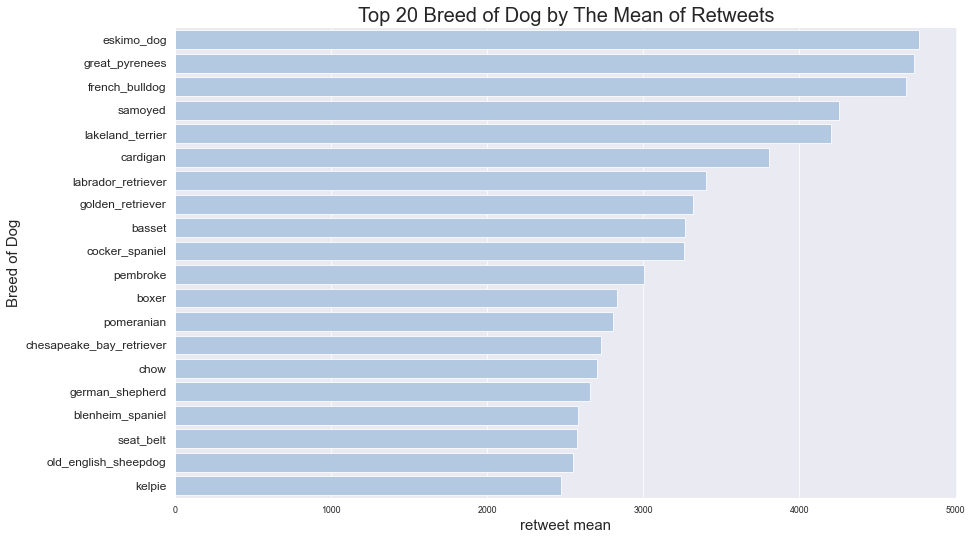

In [167]:
sns.set_context("paper", rc={"font.size":50,"axes.titlesize":20,"axes.labelsize":15})
sns.set_style("darkgrid")
g =sns.catplot(x="retweet_mean", y="breed_dog", kind = 'bar',color= '#abc9ea', data= breed_retweet)
g.set_axis_labels( 'retweet mean', 'Breed of Dog')
g.set(title='Top 20 Breed of Dog by The Mean of Retweets')
g.set_yticklabels(size = 12)
plt.gcf().set_size_inches(30, 10)

In [ ]:
!jupyter nbconvert act_report_presentation.ipynb --to slides --post serve  --no-input --no-prompt 